In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import cv2
import pandas as pd

In [2]:
# Step 1: Load and split the dataset
directory = "/FinaldatasetCopy/"
image_size = (150, 150)
classes = ["Ripe", "UnRipe", "OverRipe"]
num_classes = len(classes)

In [3]:
training_data=[]
def create_training_data():
    for category in classes:
        path=os.path.join(directory, category)
        class_num=classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(150,150))
                image_hsv = cv2.cvtColor(new_array, cv2.COLOR_RGB2HSV)
                training_data.append([image_hsv,class_num])
            except Exception as e:
                pass
create_training_data()

In [4]:
lenofimage = len(training_data)
print(lenofimage)

975


In [5]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)

In [6]:
#X = np.array(X)
#y = np.array(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [8]:
print(y_test)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [9]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# KNN 

from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knnModel.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred = knnModel.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accuracy: ",accuracy_score(y_test,y_pred),"\n")
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy:  0.9435897435897436 



In [12]:
# Step 5: Test the model
y_test_pred = knnModel.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9435897435897436


In [13]:
# Step 5: Train the mode 
from sklearn.metrics import confusion_matrix, accuracy_score

y_train_pred = knnModel.predict(X_train)
train_cm = confusion_matrix(y_train, y_train_pred)
print(train_cm)
accuracy_score(y_train, y_train_pred)

[[ 22  17   0]
 [  1 726   0]
 [  3  11   0]]


0.958974358974359

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

test_cm = confusion_matrix(y_test, y_test_pred)
print(test_cm)
accuracy_score(y_test, y_test_pred)

[[  0   4   0]
 [  0 184   0]
 [  2   5   0]]


0.9435897435897436

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

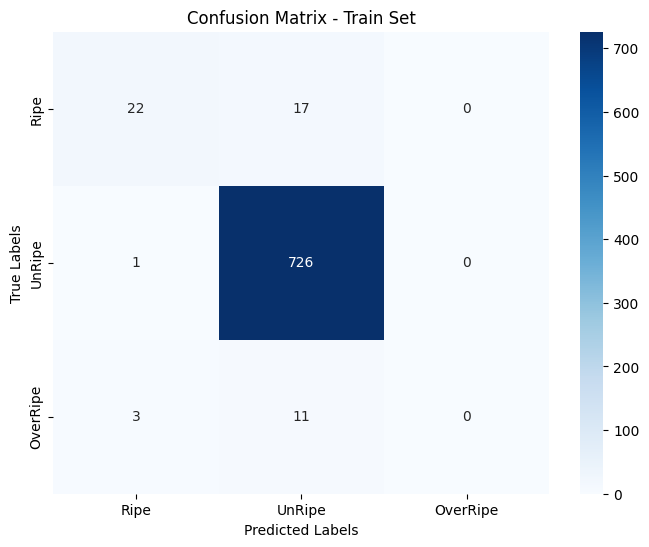

In [16]:
# confusion matrix 
# Plot the confusion matrix for the train set
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix - Train Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

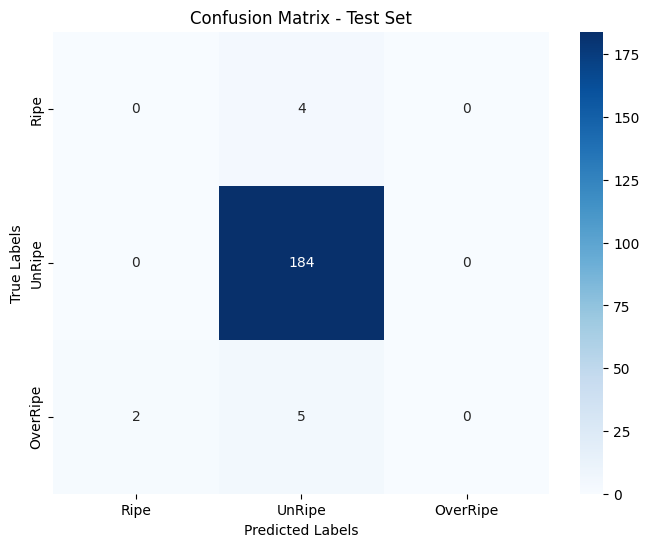

In [17]:
# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [18]:
# Model accuracy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [19]:
# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

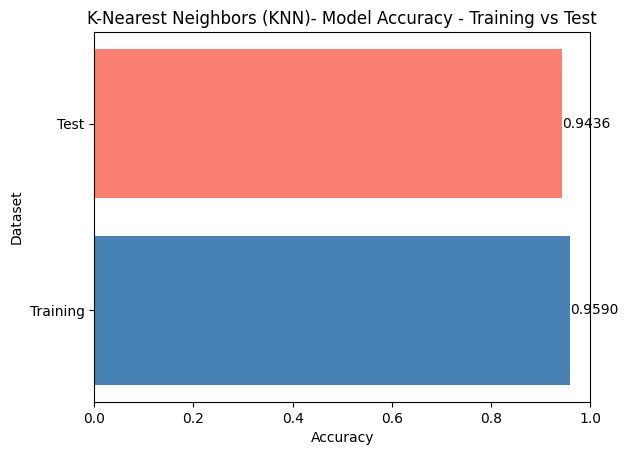

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Set the labels and accuracy scores
labels = ['Training', 'Test']
accuracy_scores = [train_accuracy, test_accuracy]
colors = ['steelblue', 'salmon']

# Plot the horizontal bar chart
plt.barh(labels, accuracy_scores, color=colors)

# Add text annotations for each bar
for i, score in enumerate(accuracy_scores):
    plt.text(score, i, f'{score:.4f}', va='center')

# Set the x-axis limits
plt.xlim([0, 1])

# Set the plot title and labels
plt.title('K-Nearest Neighbors (KNN)- Model Accuracy - Training vs Test')
plt.xlabel('Accuracy')
plt.ylabel('Dataset')

# Display the plot
plt.show()


C:\Users\saons\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


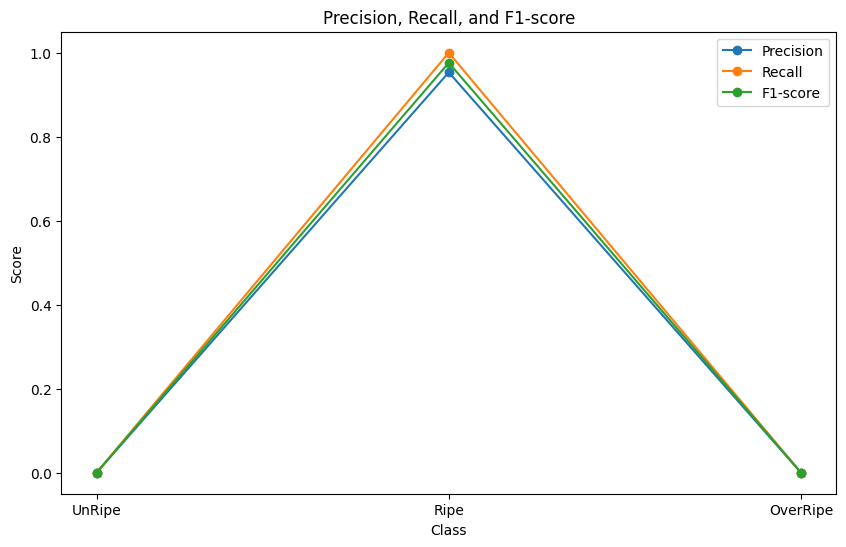

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have the true labels in y_true and the predicted labels in y_pred
y_true= y_test
y_pred=y_test_pred

# Calculate precision, recall, and F1-score
precision = precision_score(y_true, y_test_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)
f1 = f1_score(y_true, y_pred, average=None)

# Set class labels
class_labels = ['UnRipe', 'Ripe', 'OverRipe']

# Create line graphs
plt.figure(figsize=(10, 6))

# Precision line graph
plt.plot(class_labels, precision, marker='o', label='Precision')
# Recall line graph
plt.plot(class_labels, recall, marker='o', label='Recall')
# F1-score line graph
plt.plot(class_labels, f1, marker='o', label='F1-score')

# Set axis labels and title
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-score')

# Set legend
plt.legend()

# Display the plot
plt.show()


Train: 0.850, Test: 0.880


C:\Users\saons\AppData\Local\Temp\ipykernel_17152\3997903910.py:29: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  pyplot.subplot(211)
C:\Users\saons\AppData\Local\Temp\ipykernel_17152\3997903910.py:35: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  pyplot.subplot(212)


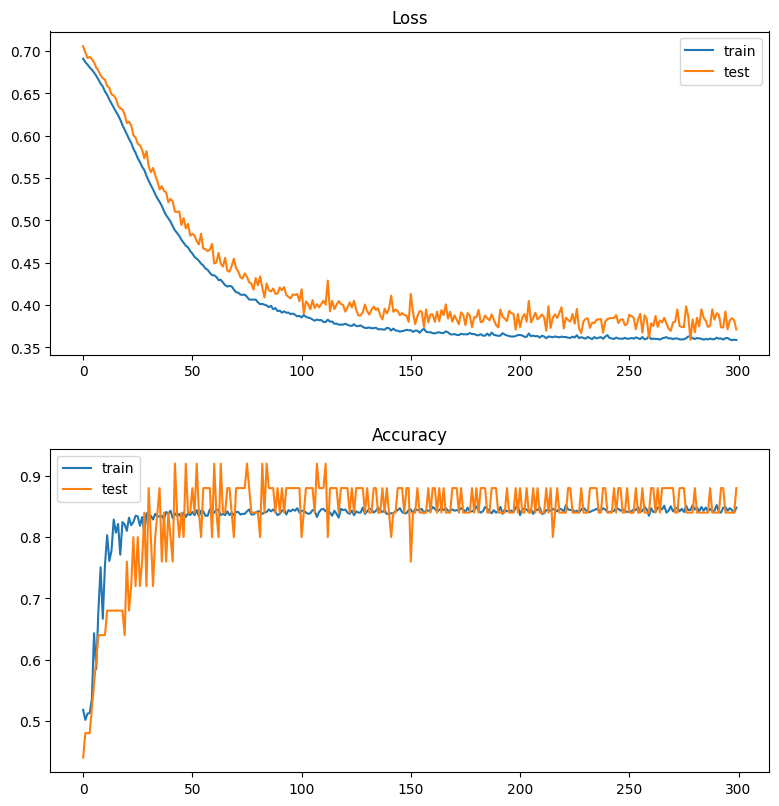

In [22]:
# Loss and accuracy
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
# generate dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# split into train and test
n_test = lenofimage
trainX, testX = X[:n_test, :], X[n_test:, :]
trainy, testy = y[:n_test], y[n_test:]
# define model
model = Sequential()
model.add(Dense(100, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=300, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

fig, axes = pyplot.subplots(nrows=4, ncols=4, figsize=(8, 8))
fig.tight_layout()

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

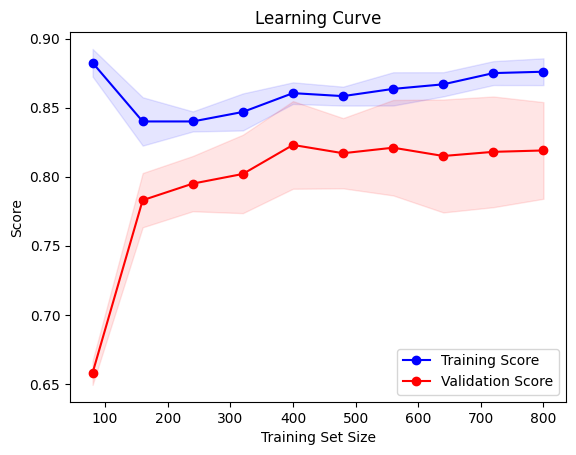

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assuming you have your feature matrix in X and labels in y
# Assuming you have defined your classifier or model as 'model'

# Specify the training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)  # 10 evenly spaced training set sizes from 10% to 100%

# Calculate learning curve scores
train_sizes_abs, train_scores, val_scores = learning_curve(knnModel, X, y, train_sizes=train_sizes, cv=5)

# Calculate the mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.plot(train_sizes_abs, train_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes_abs, val_mean, 'o-', color='red', label='Validation Score')
plt.fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes_abs, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.show()
